In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import  train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score

In [2]:
# Load the datasets into Pandas DataFrames
df = pd.read_csv('/kaggle/input/loandefault/train.csv')


In [3]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [5]:
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [6]:
# Get all categorical columns
categorical_columns = df.select_dtypes(include='object')

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical columns to numeric labels
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the DataFrame with label-encoded categorical columns
print(df)

             ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0      65087372        10000          32236             12329.36286    59   
1       1450153         3609          11940             12191.99692    59   
2       1969101        28276           9311             21603.22455    59   
3       6651430        11170           6954             17877.15585    59   
4      14354669        16890          13226             13539.92667    59   
...         ...          ...            ...                     ...   ...   
67458  16164945        13601           6848             13175.28583    59   
67459  35182714         8323          11046             15637.46301    59   
67460  16435904        15897          32921             12329.45775    59   
67461   5300325        16567           4975             21353.68465    59   
67462  65443173        15353          29875             14207.44860    59   

       Batch Enrolled  Interest Rate  Grade  Sub Grade  Employment Duration

In [8]:
# Select all the numeric features 
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

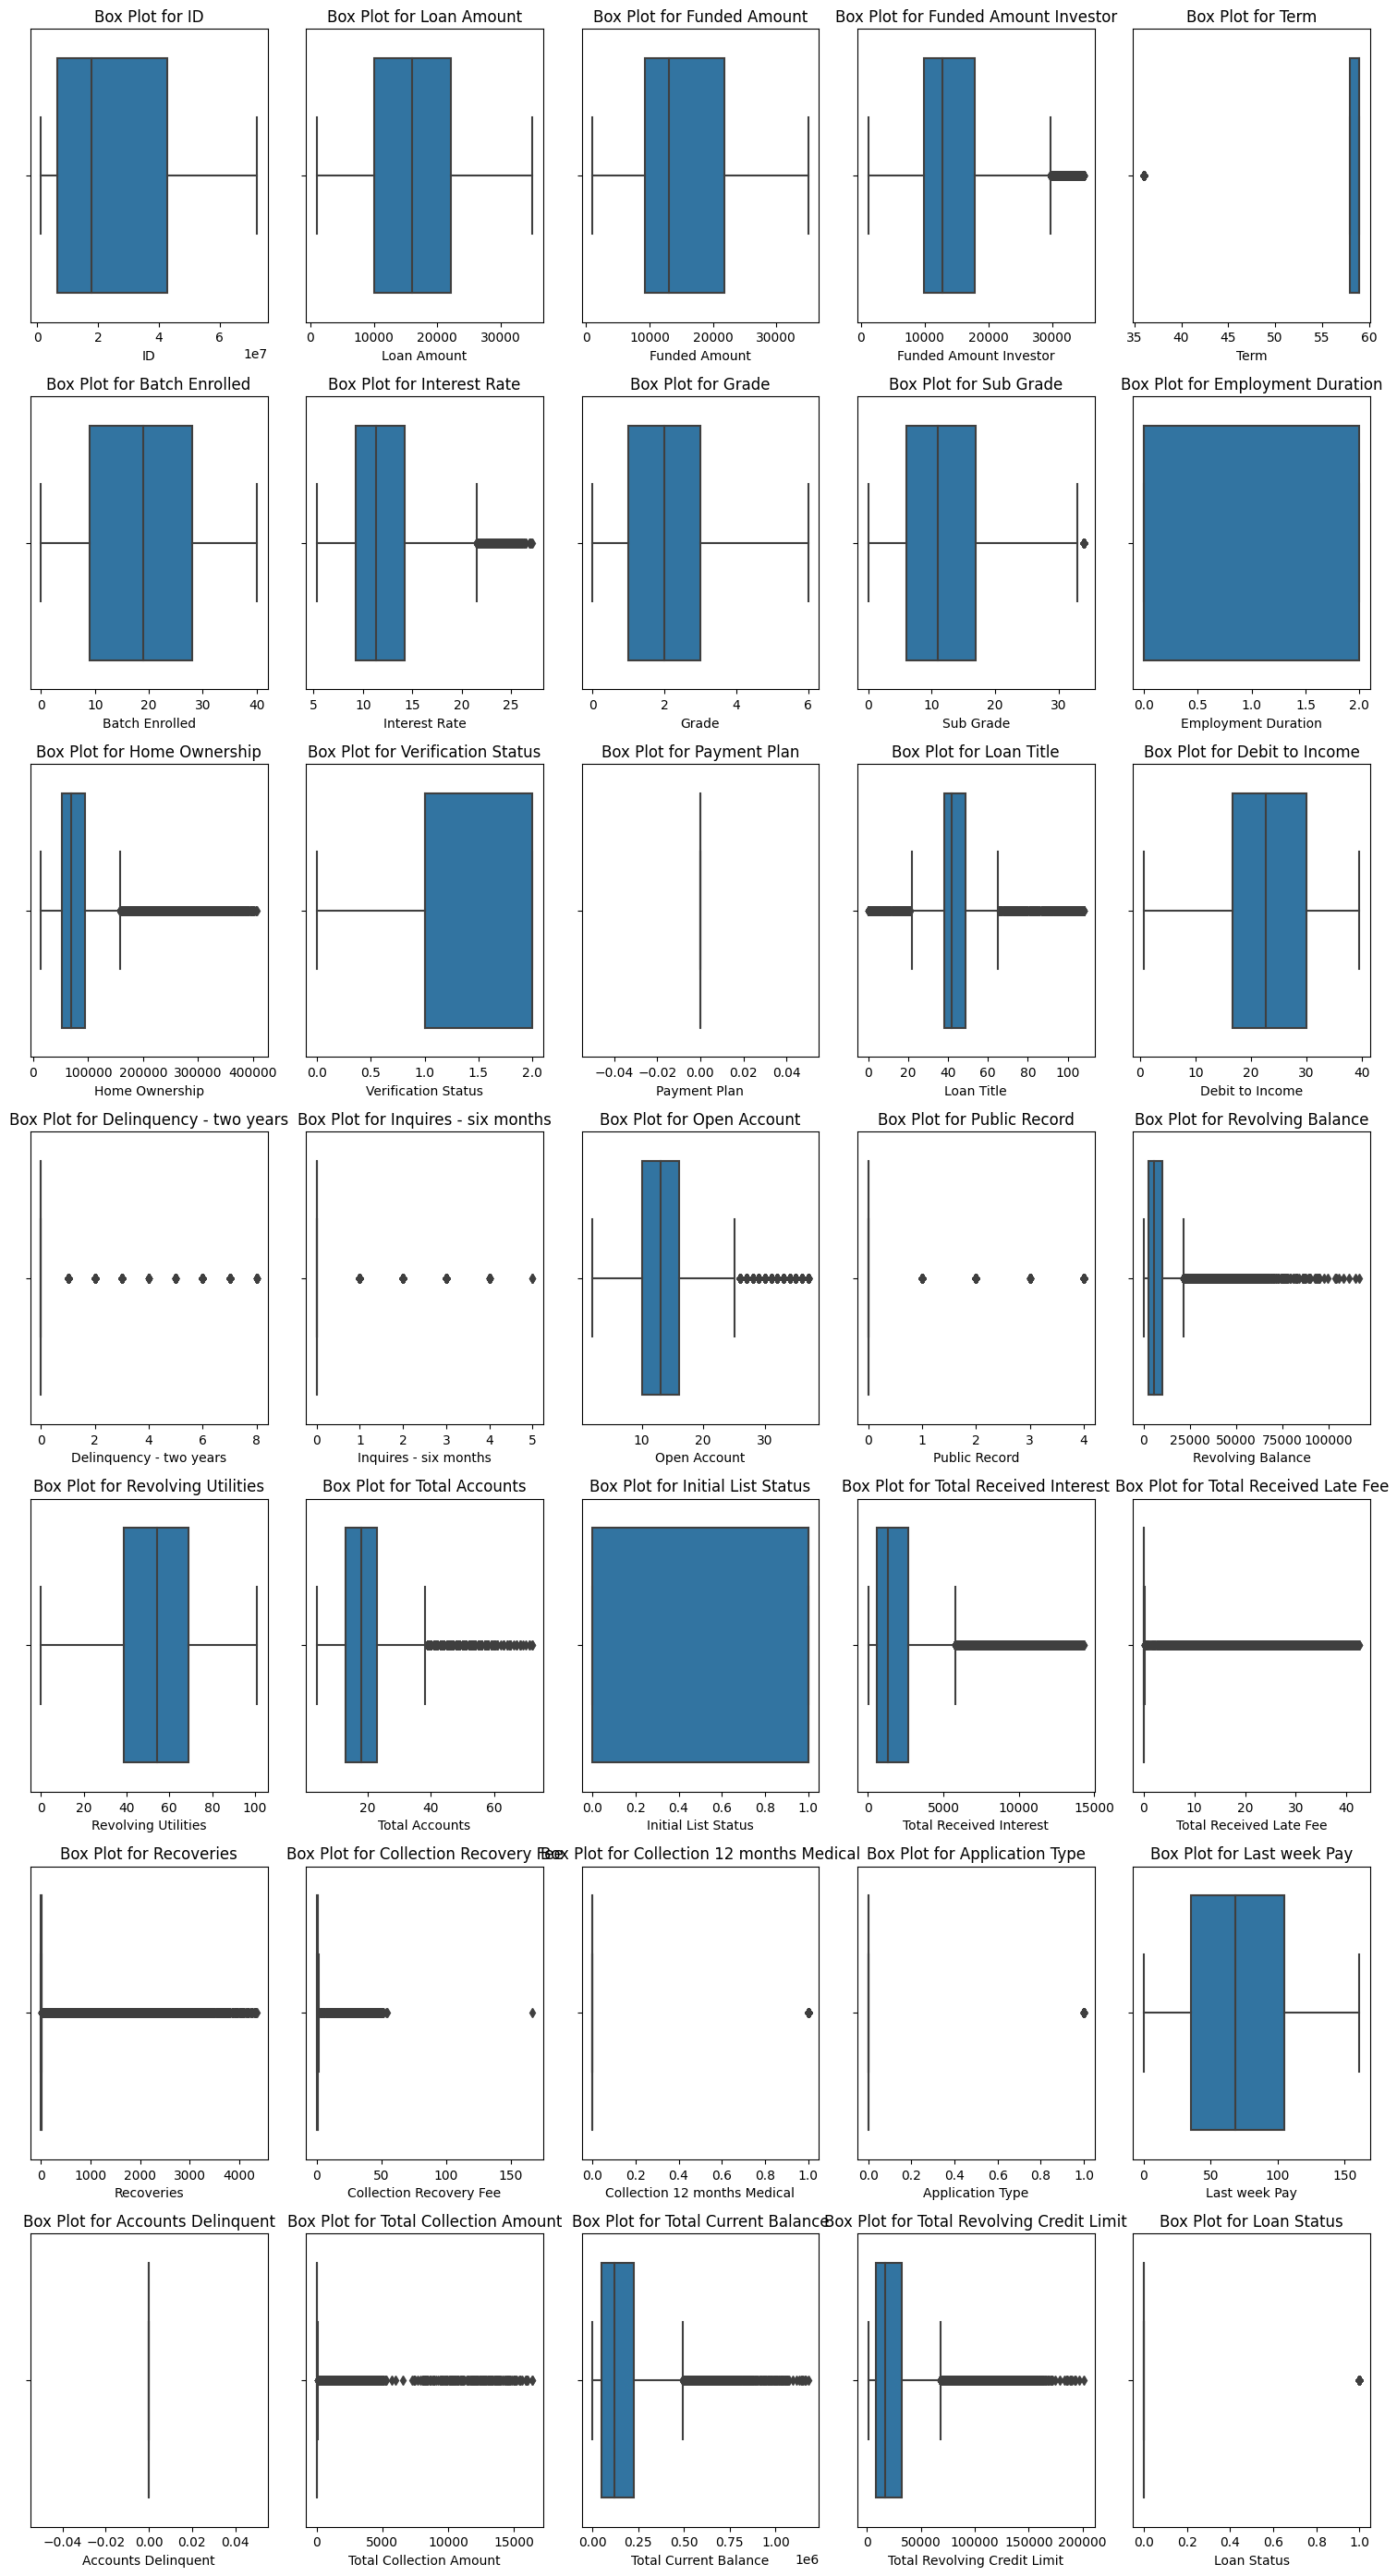

In [9]:
import math

# Calculate the number of rows and columns for subplots
num_features = len(numeric_features)
num_cols = 5  # Number of subplots per row
num_rows = math.ceil(num_features / num_cols)

# Create subplots
plt.figure(figsize=(15, num_rows * 4))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot for {feature}')
plt.tight_layout()
plt.show()


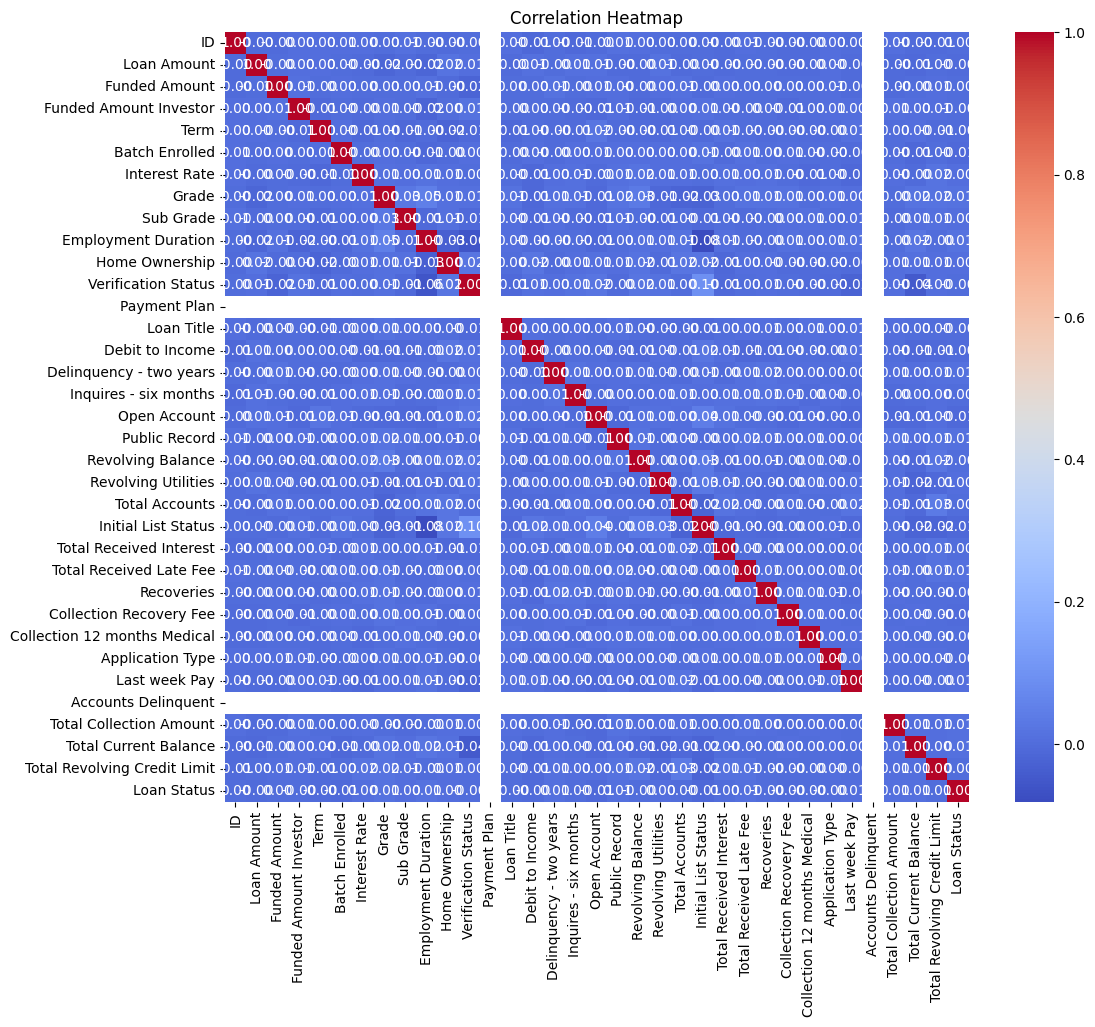

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [11]:


# Calculate the correlation
correlation = df.corr()['Loan Status']

# Sort the correlation values in descending order to see the most highly correlated features
correlation = correlation.sort_values(ascending=False)

# Print the correlation values
print(correlation)


Loan Status                     1.000000
Employment Duration             0.011927
Grade                           0.011657
Public Record                   0.010590
Delinquency - two years         0.009990
Total Current Balance           0.009828
Total Received Late Fee         0.009365
Total Collection Amount         0.007892
Last week Pay                   0.006117
Revolving Utilities             0.004120
Home Ownership                  0.003716
Sub Grade                       0.003675
Interest Rate                   0.002900
Total Received Interest         0.001680
Total Revolving Credit Limit    0.001454
Funded Amount                   0.001364
Inquires - six months           0.000578
ID                              0.000472
Total Accounts                  0.000222
Funded Amount Investor         -0.000091
Loan Title                     -0.000416
Application Type               -0.000454
Recoveries                     -0.000652
Collection 12 months Medical   -0.000686
Revolving Balanc

In [12]:
X = df.drop('Loan Status',axis=1)
y = df['Loan Status']

In [13]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
smote.fit(X,y)
X,y=smote.fit_resample(X,y)

In [14]:
from sklearn.model_selection import train_test_split

# Splitting the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
# Standardizing the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

# Creating a Sequential model
model = Sequential()

# Add the input layer 
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Add one or more hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add the output layer with a single neuron for binary classification and a sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and an appropriate optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model on your training data
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluating the model on your testing data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/10
3062/3062 [==============================] - 6s 2ms/step - loss: 0.5423 - accuracy: 0.7265
Epoch 2/10
3062/3062 [==============================] - 4s 1ms/step - loss: 0.4867 - accuracy: 0.7694
Epoch 3/10
3062/3062 [==============================] - 4s 1ms/step - loss: 0.4726 - accuracy: 0.7783
Epoch 4/10
3062/3062 [==============================] - 4s 1ms/step - loss: 0.4632 - accuracy: 0.7853
Epoch 5/10
3062/3062 [==============================] - 4s 1ms/step - loss: 0.4558 - accuracy: 0.7884
Epoch 6/10
3062/3062 [==============================] - 4s 1ms/step - loss: 0.4493 - accuracy: 0.7925
Epoch 7/10
3062/3062 [==============================] - 4s 1ms/step - loss: 0.4439 - accuracy: 0.7974
Epoch 8/10
3062/3062 [==============================] - 5s 1ms/step - loss: 0.4396 - accuracy: 0.7981
Epoch 9/10
3062/3062 [==============================] - 4s 1ms/step - loss: 0.4356 - accuracy: 0.8021
Epoch 10/10
766/766 [==============================] - 1s 1ms/step - loss: 0.4622 

In [17]:
from keras.layers import Dropout

# Create a Sequential model
deep_model = Sequential()

# Add the input layer (adjust input_dim to match the number of features)
deep_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Add multiple hidden layers
deep_model.add(Dense(64, activation='relu'))
deep_model.add(Dropout(0.5))  # Add dropout layer to reduce overfitting
deep_model.add(Dense(32, activation='relu'))
deep_model.add(Dense(16, activation='relu'))

# Add the output layer with a single neuron for binary classification and a sigmoid activation function
deep_model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and an appropriate optimizer 
deep_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the deep model on your training data
deep_model.fit(X_train, y_train, epochs=15, batch_size=64)

# Evaluate the deep model on your testing data
loss, accuracy = deep_model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print(f"Deep Model Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/15
1531/1531 [==============================] - 4s 2ms/step - loss: 0.5754 - accuracy: 0.6993
Epoch 2/15
1531/1531 [==============================] - 3s 2ms/step - loss: 0.5047 - accuracy: 0.7588
Epoch 3/15
1531/1531 [==============================] - 3s 2ms/step - loss: 0.4874 - accuracy: 0.7696
Epoch 4/15
1531/1531 [==============================] - 3s 2ms/step - loss: 0.4772 - accuracy: 0.7763
Epoch 5/15
1531/1531 [==============================] - 3s 2ms/step - loss: 0.4677 - accuracy: 0.7833
Epoch 6/15
1531/1531 [==============================] - 3s 2ms/step - loss: 0.4618 - accuracy: 0.7870
Epoch 7/15
1531/1531 [==============================] - 3s 2ms/step - loss: 0.4558 - accuracy: 0.7911
Epoch 8/15
1531/1531 [==============================] - 3s 2ms/step - loss: 0.4515 - accuracy: 0.7933
Epoch 9/15
1531/1531 [==============================] - 3s 2ms/step - loss: 0.4460 - accuracy: 0.7971
Epoch 10/15
1531/1531 [==============================] - 3s 2ms/step - loss: 0.444

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Predictions for the baseline model
y_pred_baseline = model.predict(X_test)
y_pred_baseline = (y_pred_baseline > 0.5).astype(int)

# Predictions for the deep model (if applicable)
y_pred_deep = deep_model.predict(X_test)
y_pred_deep = (y_pred_deep > 0.5).astype(int)

# Evaluate the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
f1_score_baseline = f1_score(y_test, y_pred_baseline)
roc_auc_baseline = roc_auc_score(y_test, y_pred_baseline)

# Evaluate the deep model
accuracy_deep = accuracy_score(y_test, y_pred_deep)
precision_deep = precision_score(y_test, y_pred_deep)
recall_deep = recall_score(y_test, y_pred_deep)
f1_score_deep = f1_score(y_test, y_pred_deep)
roc_auc_deep = roc_auc_score(y_test, y_pred_deep)


766/766 [==============================] - 1s 1ms/step


Metrics for Baseline Model:
Accuracy: 0.788680632120544
Precision: 0.8012443535327708
Recall: 0.7678046390068605
F1-Score: 0.7841681611544395
ROC-AUC: 0.788679779691262
Metrics for Deep Neural Network Model:
Accuracy: 0.7968475642125036
Precision: 0.7767877541695225
Recall: 0.8330610911466841
F1-Score: 0.8039408866995074
ROC-AUC: 0.7968490429191976


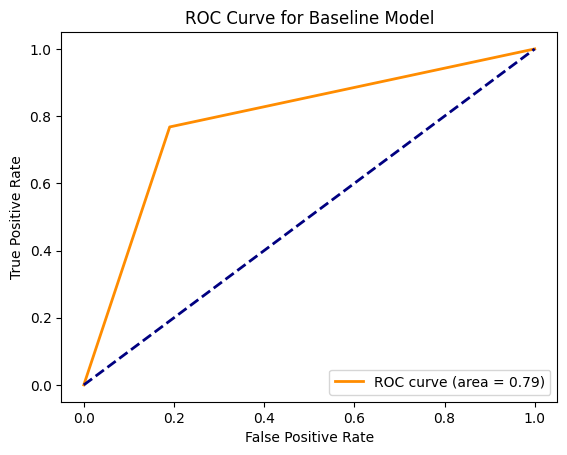

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate accuracy for the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

# Calculate precision for the baseline model
precision_baseline = precision_score(y_test, y_pred_baseline)

# Calculate recall for the baseline model
recall_baseline = recall_score(y_test, y_pred_baseline)

# Calculate F1-score for the baseline model
f1_score_baseline = f1_score(y_test, y_pred_baseline)

# Calculate ROC-AUC for the baseline model
fpr_baseline, tpr_baseline, thresholds_baseline = roc_curve(y_test, y_pred_baseline)
roc_auc_baseline = auc(fpr_baseline, tpr_baseline)

# Calculate accuracy for the deep neural network model
accuracy_deep = accuracy_score(y_test, y_pred_deep)

# Calculate precision for the deep neural network model
precision_deep = precision_score(y_test, y_pred_deep)

# Calculate recall for the deep neural network model
recall_deep = recall_score(y_test, y_pred_deep)

# Calculate F1-score for the deep neural network model
f1_score_deep = f1_score(y_test, y_pred_deep)

# Calculate ROC-AUC for the deep neural network model
fpr_deep, tpr_deep, thresholds_deep = roc_curve(y_test, y_pred_deep)
roc_auc_deep = auc(fpr_deep, tpr_deep)

# Print  the metrics
print("Metrics for Baseline Model:")
print(f"Accuracy: {accuracy_baseline}")
print(f"Precision: {precision_baseline}")
print(f"Recall: {recall_baseline}")
print(f"F1-Score: {f1_score_baseline}")
print(f"ROC-AUC: {roc_auc_baseline}")

print("Metrics for Deep Neural Network Model:")
print(f"Accuracy: {accuracy_deep}")
print(f"Precision: {precision_deep}")
print(f"Recall: {recall_deep}")
print(f"F1-Score: {f1_score_deep}")
print(f"ROC-AUC: {roc_auc_deep}")

# visualizing the ROC curve
plt.figure()
plt.plot(fpr_baseline, tpr_baseline, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_baseline:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Baseline Model')
plt.legend(loc="lower right")
plt.show()



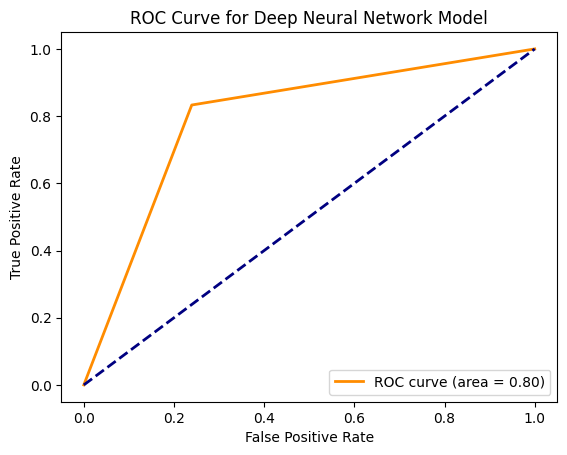

In [20]:
# Visualize the ROC curve for the deep neural network model
plt.figure()
plt.plot(fpr_deep, tpr_deep, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_deep:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Deep Neural Network Model')
plt.legend(loc="lower right")
plt.show()